In [1]:
import Agent_Library
from   Agent_Library import np, plt, Camera, tf

import pandas as pd

import importlib
# import psutil
# import cProfile, pstats
# import snakeviz.cli as cli
# %load_ext snakeviz

In [16]:
def Initializer(N, L):
    importlib.reload(Agent_Library)
    np.random.seed(37)
    # -----------------------------------------------------------------------------------
    camera = Camera(plt.figure(figsize=(15,15)))

    # Build the environment and the agents ----------------------------------------------
    Agents = []
    for _ in range(N): 
        Agents.append(Agent_Library.Distributed_Agent(L, flipping=True, requesting=False, moving=False, training=False))
    
    environment = Agent_Library.Plot_Environment(L, Agents)
    
    # Parameters displayed in plots -----------------------------------------------------
    Hamilton = []               # To display the Hamiltonian value per episede
    Giant  = []                 # To display the percentage of members of the giant component 
    Edges  = []                 # To display the number of links in the network
    Energy = []                 # To display the amount of energy consumed by all agents
    R_avg  = []
    Tau    = []                 # To show the stability of links
    
    return camera, environment, Agents, Hamilton, Giant, Edges, Energy, R_avg, Tau

Episode: 1000, H: -204.523, Giant: 77.00, N: 100.0

 Avrage Hamiltonian: -208.624 
 Avrage Radius: 1.688 
 Avrage Giant: 75.688 
 Arg Max R 81 	 Max R: 2.636414022108062


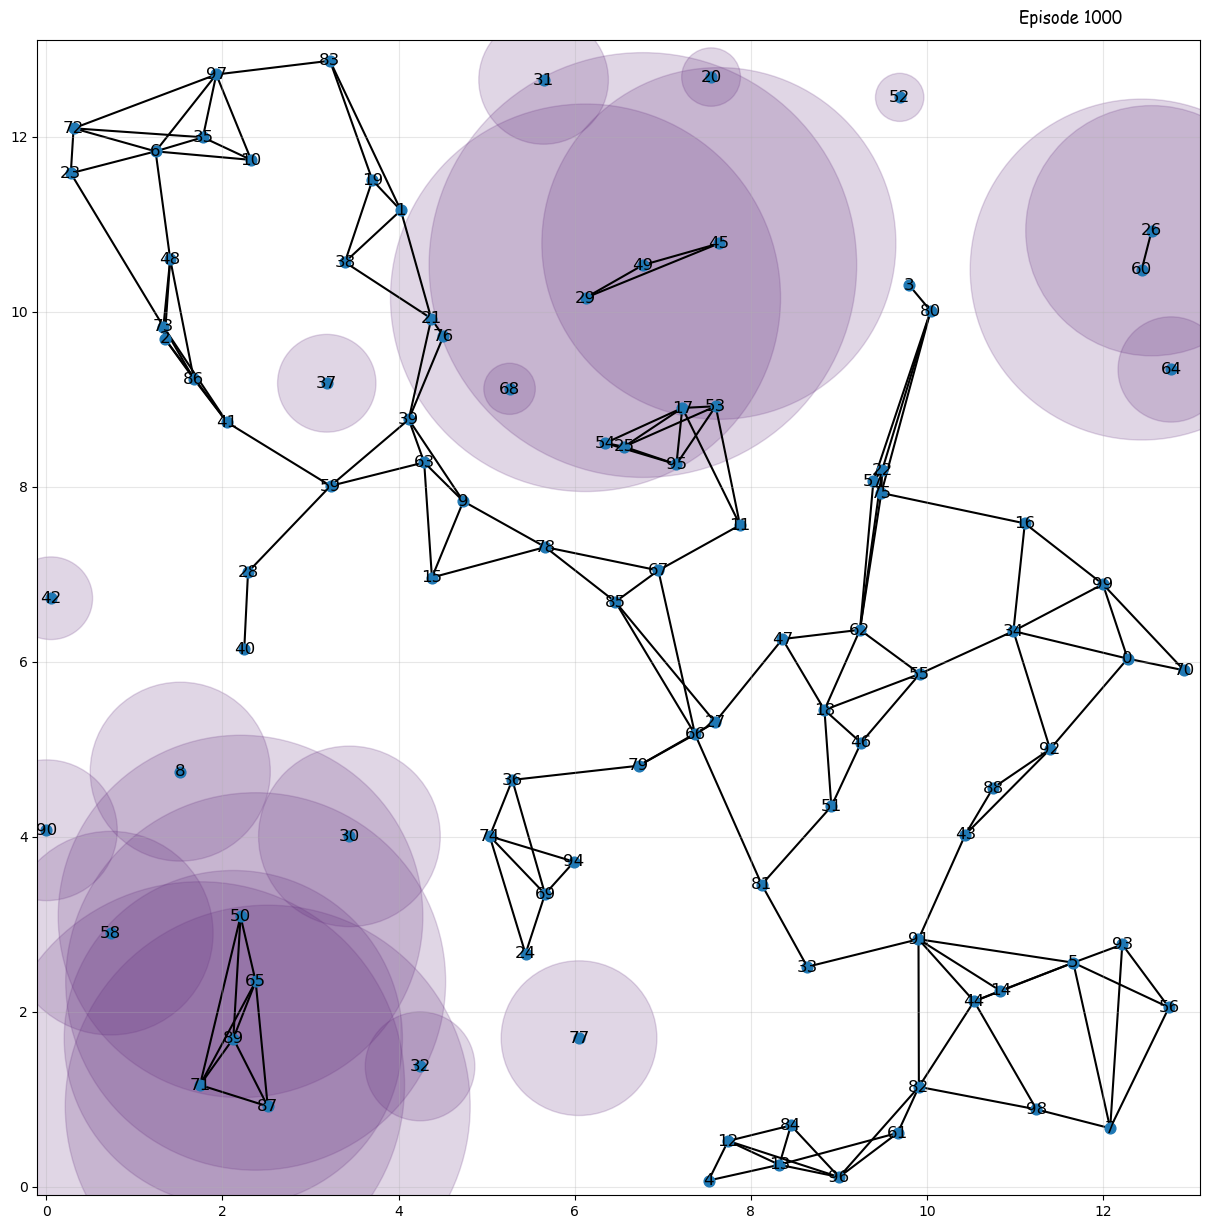

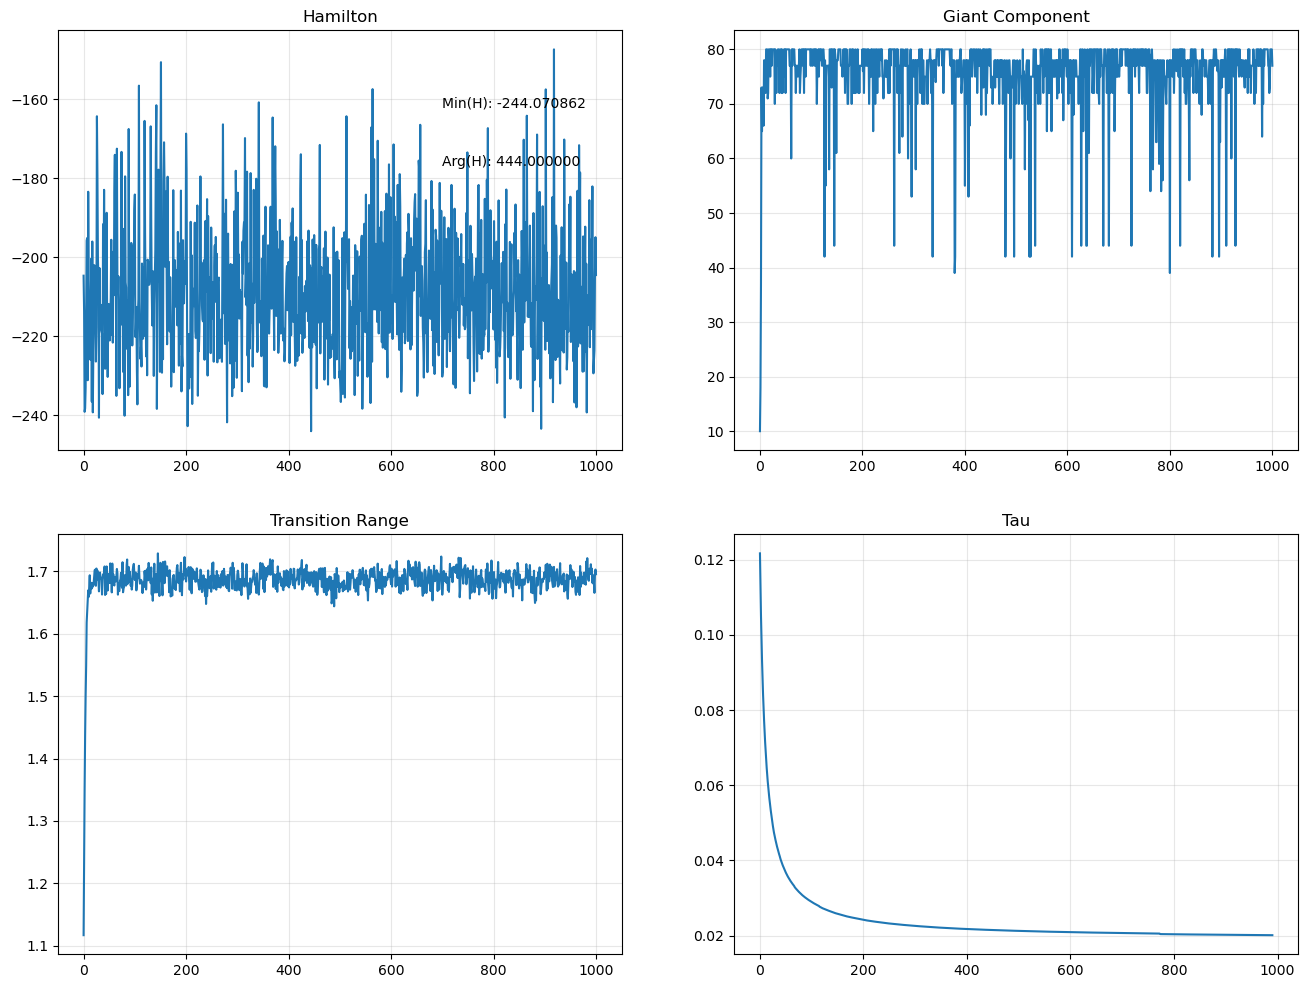

In [17]:
N = 100                      # Number of agents
L = 13                       # The length of the simulation box
camera, environment, Agents, Hamilton, Giant, Edges, Energy, R_avg, Tau = Initializer(N, L)


for episode in range(1001):
    for i in range(len(Agents)): Agents[i].Prediction( (Agents[:i] + Agents[i+1:]) )


    # Show Results --------------------------------------------------------------------------
    hamilton, edge, energy, average_r, giant, tau = environment.Calculate_Result(Agents, episode)
    Hamilton.append(hamilton)
    Edges.append(edge)
    Energy.append(energy)
    R_avg.append(average_r)
    Giant.append(giant)
    Tau.append(tau)

    if episode%10 == 0: environment.Animation(camera, episode)

    # cpu_percent = psutil.cpu_percent(interval=1, percpu=True)
    print("\rEpisode: {}, H: {:.3f}, Giant: {:.2f}, N: {:.1f}".format(episode, hamilton, giant, environment.N), end="")

anim = camera.animate(interval= 120, repeat=True, repeat_delay= 500, blit=True)
anim.save('./All result/animation.gif')

#-------------------------------------------------------------------------------
print("\n\n", 
      "Avrage Hamiltonian:" , round(np.average(Hamilton[20:]), 3),  "\n",
      "Avrage Radius:"      , round(np.average(R_avg[20:]), 3),     "\n",
      "Avrage Giant:"       , round(np.average(Giant[20:]), 3),     "\n",

      "Arg Max R", np.argmax(np.array([Agents[i].r for i in range(N)])), "\t", "Max R:", max([Agents[i].r for i in range(N)]) )
environment.Static_Plot(episode, Hamilton, Edges, R_avg, Giant, Tau[10:])

#-------------------------------------------------------------------------------
df = pd.DataFrame({'Hamilton': Hamilton, 'Giant': Giant, 'Edges': Edges, 'Energy': Energy, 'Tau': Tau, 'R_avg': R_avg})
df.to_csv('./All result/csv/Results.csv')


In [15]:
@tf.function
def predict(state): return Agents[0].model( np.array([state]))

def Prediction(state):
    action = np.argmax( Agents[0].model.predict( np.array([state]), verbose=0)[0])
    print(predict([1,1,2]).numpy()[0])
    return action


np.argmax(predict([1,1,2]).numpy()[0])
(predict([1,1,2]).numpy()[0])

Prediction([1,1,2])

[5.817543  5.9057007]


1

In [ ]:
# with cProfile.Profile() as profile: main()
# stats = pstats.Stats(profile).sort_stats('cumtime')
# stats.dump_stats("./All result/cProFile/cProFile.prof")

# stats.print_stats()
# cli.main(["./All result/cProFile/cProFile.prof"])